## Notebook to create simple directed social network graphs with $\chi^2$-distributed degrees

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime
import random
import itertools
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import spearmanr
from itertools import combinations


In [8]:
START = datetime.now()

### Network Size

In [3]:
# Declare the size of the network
while True:
    try:
        numNodes = int(input('Declare the number of users in the network: '))
    except ValueError:
        print('Please enter an integer number.')
    else:
        if numNodes < 2:
            print('Network must have at least 2 nodes.')
        else:
            break

print('Your network will consist of %d users.' %(numNodes))


Declare the number of users in the network: 500
Your network will consist of 500 users.


### Spearman's rank correlation of the degrees:

- $\rho_1 = \rho(\text{reciprocal, in})$
- $\rho_2 = \rho(\text{reciprocal, out})$
- $\rho_3 = \rho(\text{in, out})$


In [4]:
# Declare the rank correlation between reciprocal, in- and out-degree
while True:
    try:
        Rho_1 = float(input('Declare the rank correlation between reciprocal and in-degree: '))
    except ValueError:
        print('Rank Correlation must be a number.')
    else:
        if ((Rho_1 > 1) or (Rho_1 < -1)):
            print('Rank Correlation must be between -1 and 1.')
        else:
            break
        
while True:
    try:
        Rho_2 = float(input('Declare the rank correlation between reciprocal and out-degree: '))
    except ValueError:
        print('Rank Correlation must be a number.')
    else:
        if ((Rho_2 > 1) or (Rho_2 < -1)):
            print('Rank Correlation must be between -1 and 1.')
        else:
            break
            
while True:
    try:
        Rho_3 = float(input('Declare the rank correlation between in- and out-degree: '))
    except ValueError:
        print('Rank Correlation must be a number.')
    else:
        if ((Rho_3 > 1) or (Rho_3 < -1)):
            print('Rank Correlation must be between -1 and 1.')
        else:
            break

print()      
print('Rank Correlation between reciprocal and in-degree: %f' %(Rho_1))
print('Rank Correlation between reciprocal and out-degree: %f' %(Rho_2))
print('Rank Correlation between in- and out-degree: %f' %(Rho_3))


Declare the rank correlation between reciprocal and in-degree: .8
Declare the rank correlation between reciprocal and out-degree: .8
Declare the rank correlation between in- and out-degree: .8

Rank Correlation between reciprocal and in-degree: 0.800000
Rank Correlation between reciprocal and out-degree: 0.800000
Rank Correlation between in- and out-degree: 0.800000


In [5]:
# Map Spearman's Rho into the linear correaltion coefficient R

# R = 2*sin(rho_s*pi/6)

R_1 = 2*np.sin(Rho_1*np.pi/6)
R_2 = 2*np.sin(Rho_2*np.pi/6)
R_3 = 2*np.sin(Rho_3*np.pi/6)

print(R_1, R_2, R_3)


0.8134732861516003 0.8134732861516003 0.8134732861516003


### Sample Gaussian normal distributed, correlated data and transform it into the $\mathcal{U}_{]0,1[}^3$ - space

In [6]:
# Generate datapoints that are multivariate normally distributed with mean 0 and the covariance matrix as determined above
mean = [0,0,0]
cov = [[1,R_1,R_2], [R_1,1,R_3], [R_2,R_3,1]] 

norm_1,norm_2,norm_3 = np.random.multivariate_normal(mean, cov, numNodes).T

# Transform the data to be uniformly distributed
unif_1 = norm.cdf(norm_1)
unif_2 = norm.cdf(norm_2)
unif_3 = norm.cdf(norm_3)


### Declare the parameters (df, loc and scale) for the degree distributions

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

In [7]:
# Declare the parameters for the reciprocal degree distribution
while True:
    try:
        df = float(input('Declare the degrees of freedom for the reciprocal degree distribution: '))
    except ValueError:
        print('Degrees of freedom must be a number.')
    else:
        if (df <= 0):
            print('Degrees of freedom must be a positive number.')
        else:
            break
        
while True:
    try:
        loc = float(input('Declare the location parameter for the reciprocal degree distribution: '))
    except ValueError:
        print('Location parameter must be a number.')
    else:
        if (loc < 0):
            print('Location parameter may not be negative.')
        else:
            break
            
while True:
    try:
        scale = float(input('Declare the scale parameter for the reciprocal degree distribution: '))
    except ValueError:
        print('Scale parameter must be a number.')
    else:
        if (scale <= 0):
            print('Scale parameter must be a positive number.')
        else:
            break

print()
mean, var, skew, kurt = chi2.stats(df=df, loc=loc, scale=scale, moments='mvsk')
print('Mean:', mean)
print('Standard deviation:', np.sqrt(var))


Declare the degrees of freedom for the reciprocal degree distribution: 0.5
Declare the location parameter for the reciprocal degree distribution: 0.49
Declare the scale parameter for the reciprocal degree distribution: 20

Mean: 10.49
Standard deviation: 20.0


In [8]:
RECIPROCAL = chi2.ppf(unif_1, df=df, loc=loc, scale=scale)
RECIPROCAL = np.round(RECIPROCAL)


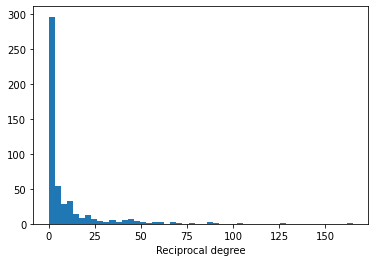

In [9]:
plt.hist(RECIPROCAL, bins=50)
plt.xlabel('Reciprocal degree')
plt.show()


In [10]:
# Declare the parameters for the in-degree distribution
while True:
    try:
        df = float(input('Declare the degrees of freedom for the in-degree distribution: '))
    except ValueError:
        print('Degrees of freedom must be a number.')
    else:
        if (df <= 0):
            print('Degrees of freedom must be a positive number.')
        else:
            break
        
while True:
    try:
        loc = float(input('Declare the location parameter for the in-degree distribution: '))
    except ValueError:
        print('Location parameter must be a number.')
    else:
        if (loc < 0):
            print('Location parameter may not be negative.')
        else:
            break
            
while True:
    try:
        scale = float(input('Declare the scale parameter for the in-degree distribution: '))
    except ValueError:
        print('Scale parameter must be a number.')
    else:
        if (scale <= 0):
            print('Scale parameter must be a positive number.')
        else:
            break

print()
mean, var, skew, kurt = chi2.stats(df=df, loc=loc, scale=scale, moments='mvsk')
print('Mean:', mean)
print('Standard deviation:', np.sqrt(var))


Declare the degrees of freedom for the in-degree distribution: 0.5
Declare the location parameter for the in-degree distribution: 0.49
Declare the scale parameter for the in-degree distribution: 10

Mean: 5.49
Standard deviation: 10.0


In [11]:
ONLY_IN = chi2.ppf(unif_2, df=df, loc=loc, scale=scale)
ONLY_IN = np.round(ONLY_IN)


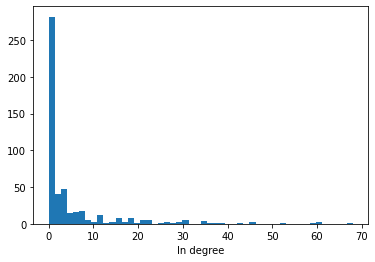

In [12]:
plt.hist(ONLY_IN, bins=50)
plt.xlabel('In degree')
plt.show()


In [13]:
# Declare the parameters for the out-degree distribution
while True:
    try:
        df = float(input('Declare the degrees of freedom for the out-degree distribution: '))
    except ValueError:
        print('Degrees of freedom must be a number.')
    else:
        if (df <= 0):
            print('Degrees of freedom must be a positive number.')
        else:
            break
        
while True:
    try:
        loc = float(input('Declare the location parameter for the out-degree distribution: '))
    except ValueError:
        print('Location parameter must be a number.')
    else:
        if (loc < 0):
            print('Location parameter may not be negative.')
        else:
            break
            
while True:
    try:
        scale = float(input('Declare the scale parameter for the out-degree distribution: '))
    except ValueError:
        print('Scale parameter must be a number.')
    else:
        if (scale <= 0):
            print('Scale parameter must be a positive number.')
        else:
            break

print()
mean, var, skew, kurt = chi2.stats(df=df, loc=loc, scale=scale, moments='mvsk')
print('Mean:', mean)
print('Standard deviation:', np.sqrt(var))


Declare the degrees of freedom for the out-degree distribution: 0.2
Declare the location parameter for the out-degree distribution: 0.49
Declare the scale parameter for the out-degree distribution: 25

Mean: 5.49
Standard deviation: 15.811388300841896


In [14]:
ONLY_OUT = chi2.ppf(unif_3, df=df, loc=loc, scale=scale)
ONLY_OUT = np.round(ONLY_OUT)


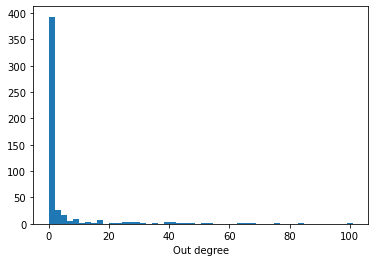

In [15]:
plt.hist(ONLY_OUT, bins=50)
plt.xlabel('Out degree')
plt.show()


### Put the sampled degrees in a dataframe

In [16]:
# Put the sampled degrees in a dataframe
SAMPLED = pd.DataFrame(columns=['Reciprocal', 'In', 'Out'])

SAMPLED['Reciprocal'] = RECIPROCAL
SAMPLED['In'] = ONLY_IN
SAMPLED['Out'] = ONLY_OUT


In [17]:
SAMPLED.describe()

Reciprocal         In         Out
count  500.000000  500.00000  500.000000
mean     9.026000    5.18600    4.462000
std     17.397663    9.59581   12.259083
min      0.000000    0.00000    0.000000
25%      1.000000    1.00000    0.000000
50%      2.000000    1.00000    1.000000
75%      9.000000    5.00000    2.000000
max    165.000000   68.00000  101.000000

In [18]:
Sampled_Rho_1 = spearmanr(SAMPLED['Reciprocal'],SAMPLED['In'])[0]
Sampled_Rho_2 = spearmanr(SAMPLED['Reciprocal'],SAMPLED['Out'])[0]
Sampled_Rho_3 = spearmanr(SAMPLED['In'],SAMPLED['Out'])[0]

print('Sampled Spearmans Rho:', Sampled_Rho_1, Sampled_Rho_2, Sampled_Rho_3)
print('Original Spearmans Rho:', Rho_1, Rho_2, Rho_3)


Sampled Spearmans Rho: 0.7637486319000225 0.7114735033368651 0.7362053209793307
Original Spearmans Rho: 0.8 0.8 0.8


### Preparation for the creation part

In [19]:
# Get the total degree per node
total = SAMPLED['Reciprocal'] + SAMPLED['In'] + SAMPLED['Out']
SAMPLED['Total'] = total

# Shuffle the dataframe
SAMPLED = SAMPLED.sample(frac=1)


In [20]:
# Percentage of nodes for rewiring
# Declare the parameters for the out-degree distribution
while True:
    try:
        REWIRE = float(input('Declare the node degree percentile for the rewiring procedure: '))
    except ValueError:
        print('Percentile must be a number.')
    else:
        if ((REWIRE < 0) or (REWIRE > 1)):
            print('Specify the percentile between 0 and 1.')
        else:
            break


Declare the node degree percentile for the rewiring procedure: 1


### Sample edges

In [21]:
# Number of nodes
numNodes = SAMPLED.shape[0]

# Node numbers
Nodes = list(range(1, numNodes+1))

# Reciprocal degrees
RECIPROCAL = list(SAMPLED['Reciprocal'])

# Out degree without reciprocal edges
OUT = list(SAMPLED['Out'])

# In degree without reciprocal edges
IN = list(SAMPLED['In'])


In [22]:
# Number of nodes with a reciprocal degree bigger than 0 
reciprocal = [i for i in RECIPROCAL if i > 0]
reciprocal = len(reciprocal)

# Number of nodes with an out degree bigger than 0 
out = [i for i in OUT if i > 0]
out = len(out)

# Number of nodes with an in degree bigger than 0 
r = [i for i in IN if i > 0]
r = len(r)

# Number of reciprocal edges
Edges_m = sum(RECIPROCAL)*2

# Number of directed edges
Edges_d = (sum(OUT) + sum(IN))/2


Self-loops

In [23]:
diag_sum_m = 0

# Probability of the diagonal elements
for i in range(numNodes):
    if RECIPROCAL[i] != 0:
        diag_sum_m += RECIPROCAL[i]**2/Edges_m
        
# Distribute the sum uniformly over all other possible edges
diag_sum_m_dist = diag_sum_m/(reciprocal*(reciprocal-1)/2)


In [24]:
diag_sum_d = 0
diag = 0

# Probability of the diagonal elements
for i in range(numNodes):
    if (IN[i] != 0 and OUT[i] != 0):
        diag_sum_d += IN[i]*OUT[i]/Edges_d
        diag +=1
        
# Distribute the sum uniformly over all other possible edges
diag_sum_d_dist = diag_sum_d/(out*r-diag)


Reciprocal edges

In [25]:
Connection_r = []

counter = 0
directed_sum = 0

for i in range(numNodes):      
    for j in range(i+1, numNodes):
        a = 0
        
        # Sampling of reciprocal edges
        if (RECIPROCAL[j] != 0 and RECIPROCAL[i] != 0):
            pr = 2*RECIPROCAL[i]*RECIPROCAL[j]/Edges_m + diag_sum_m_dist
            if pr>1:
                pr=1
            a = np.random.choice(np.arange(0,2), p=[1-pr, pr])
            if a == 1:
                Connection_r.append((i+1,j+1))
                Connection_r.append((j+1,i+1))
                
                # This part is for the compensation for the sampled edges that we lose while trying to sample directed edges
                if(IN[i] != 0 and OUT[j] != 0):
                    counter += 1
                    directed_sum += IN[i]*OUT[j]/Edges_d + diag_sum_d_dist
                    
                if(IN[j] != 0 and OUT[i] != 0):
                    counter += 1
                    directed_sum += OUT[i]*IN[j]/Edges_d + diag_sum_d_dist


In [26]:
sampled_reciprocal = directed_sum/(out*r-diag-counter)

Directed edges

In [27]:
Connection_d = []

for i in range(numNodes):      
    for j in range(i+1, numNodes):
        # if a reciprocal edge is sampled a = 1, we do not get down here
            
        # Sampling of directed edges (bigger number to smaller number)
        if(IN[i] != 0 and OUT[j] != 0):
            pr_d = IN[i]*OUT[j]/Edges_d + diag_sum_d_dist + sampled_reciprocal
            if pr_d>1:
                pr_d=1
            b = np.random.choice(np.arange(0,2), p=[1-pr_d, pr_d])
            if b == 1:
                Connection_d.append((j+1,i+1))

        # Sampling of directed edges (smaller number to bigger number)
        if(IN[j] != 0 and OUT[i] != 0):
            pr_d = OUT[i]*IN[j]/Edges_d + diag_sum_d_dist + sampled_reciprocal
            if pr_d>1:
                pr_d=1
            c = np.random.choice(np.arange(0,2), p=[1-pr_d, pr_d])
            if c == 1:
                Connection_d.append((i+1,j+1))
                

### Put nodes and edges into a graph structure

In [28]:
# Directed empty graph
Graph = nx.DiGraph()

# Add the nodes
Graph.add_nodes_from(Nodes)

# Add the edges
Graph.add_edges_from(Connection_r)   
Graph.add_edges_from(Connection_d)   

# Number of edges
print('Number of edges:', len(Graph.edges))

# Density
print('Density of the graph:', nx.density(Graph))


Number of edges: 6632
Density of the graph: 0.0265811623246493


### Save the created intermediary graph

In [29]:
# Save the graph in a gpickle format (adjlist only saved it as an undirected graph)
nx.write_gpickle(Graph, 'Network_Graph_intermediary.gpickle')

In [30]:
# Read in the saved graph (for directed graph it shall be the gpickle format)
Graph = nx.read_gpickle('Network_Graph_intermediary.gpickle')

### Edge rewiring procedure

In [31]:
# Translate the graph into a matrix
M = nx.to_numpy_matrix(Graph)

# Multiply with the transpose to find reciprocal edges
Reciprocal = nx.from_numpy_matrix(np.multiply(M,(M.T)), create_using=nx.DiGraph())

# Re-numerate the nodes of the reciprocal graph
mapping = {i: Graph for i, Graph in enumerate(list(Graph.nodes()))}
Reciprocal = nx.relabel_nodes(Reciprocal, mapping)

# List of reciprocal edges
reciprocal_edges = list(Reciprocal.edges)

# Save the node information for the graph in a dataframe
degrees = pd.concat([pd.Series(dict(Graph.in_degree()), name='in'), 
                     pd.Series(dict(Graph.out_degree()), name='out'),
                     pd.Series(dict(Reciprocal.in_degree()), name='reciprocal'),
                     pd.Series(pd.Series(dict(Graph.in_degree()))+pd.Series(dict(Graph.out_degree())), name='total')], 
                     axis=1)

degrees['Ne'] = degrees['total'] - degrees['reciprocal']


In [32]:
# Nodes with 0 or 1 neighbors are not considered for the rewiring procedure
SORT = sorted(list(degrees['Ne']))

if REWIRE == 0:
    DEG = 0
else:
    if (int(np.round(numNodes*REWIRE)) == numNodes):
        DEG = SORT[int(np.round(numNodes*REWIRE))-1]
    else:
        DEG = SORT[int(np.round(numNodes*REWIRE))-1]

print('Maximum degree for nodes considered for the rewiring procedure:', DEG)

# Nodes with a small reciprocal degree
nodes = list(degrees[(degrees['Ne'] > 1) & (degrees['Ne'] <= DEG)].index)
print('Number of nodes considered for the rewiring procedure: ', len(nodes))

MED = degrees[(degrees['Ne'] > 1) & (degrees['Ne'] <= DEG)]['Ne'].median()
print('Median degree of nodes considered for the rewiring procedure:', MED)


Maximum degree for nodes considered for the rewiring procedure: 144
Number of nodes considered for the rewiring procedure:  418
Median degree of nodes considered for the rewiring procedure: 10.0


In [33]:
# Time to estimate how much longer the procedure will take
print(datetime.now().time())

for i in range(len(nodes)):
    # print the time after every 1,000 nodes
    if i%1000 == 0:
        print(datetime.now().time())
        
    help = 0

    # First degree neighbors of the node we are investigating
    # As it is a directed graph, we need the neighbors and concatenate the predecessors
    Ne1 = list(set(list(Graph.predecessors(nodes[i])) + list(Graph.neighbors(nodes[i]))))

    # Second degree neighbors of the nodes we are investigating
    Ne2 = []
    dir_degree = len(Ne1)
    if dir_degree <= MED:
        x = 0.5
    else:
        x = 0.3
        
    # Get all the first degree neighbor pairs
    output = sum([list(map(list, combinations(Ne1, 2)))], [])
    Neighbors = random.sample(output, int(np.ceil(dir_degree * (dir_degree-1) * x)))
    
    # We give a fraction of the first degree neighbor pairs the chance to connect, depending on the node degree
    for j in range(int(np.ceil(dir_degree * (dir_degree-1) * x))):
        
        help = 0
    
        # Randomly sample the first degree neighbors that we want to check for rewiring
        # Note that the same pair can be sampled again
        Neighbor1 = Neighbors[j][0]
        Neighbor2 = Neighbors[j][1]

        # Candidates for rewiring (2nd degree neighbors)
        Candidates = []

        # Rewiring only possible if the list of candidates is not empty
        Candidates_final = []

        # Final edge to rewire
        rewire = 0

        # Only potentially rewire if the two nodes are not connected (these already form a triangle)
        if ((Neighbor1, Neighbor2) in Graph.edges or (Neighbor2, Neighbor1) in Graph.edges) == False:
            # Second degree neighbors: Here we could have multipe entries for one node as we can have a reciprocal edge
            # Therefore we eliminate duplicate entries by making the list a set and then a list again
            Ne2 = []
            Ne2.append(list(set(list(Graph.predecessors(Neighbor1)) + list(Graph.neighbors(Neighbor1)))))
            Ne2.append(list(set(list(Graph.predecessors(Neighbor2)) + list(Graph.neighbors(Neighbor2)))))
                
            # Remove all 2nd degree neighbors with a smaller number than the currently investigated node
            # This is to not interrupt the already created triangles too much
            Ne2[0] = [x for x in Ne2[0] if x > nodes[i]]
            Ne2[1] = [x for x in Ne2[1] if x > nodes[i]]

            # Find the nodes in Ne2 that are connected to both nodes of Ne1 and remove them
            non_unique = []
            intersect = set(Ne2[0]).intersection(set(Ne2[1]))
            for m in range(len(intersect)):
                non_unique.append(list(intersect)[m])

            # Remove the non-unique nodes from the list of neighbors (includes the node we are originally investigating)
            for m in range(len(non_unique)):
                Ne2[0].remove(non_unique[m])
                Ne2[1].remove(non_unique[m])

            # Lists may not be empty
            if (Ne2[0] and Ne2[1]):

                # Give it 10 tries to find an edge for the rewiring (here we do not loop throigh all, but randomy choose two nodes from both lists of 2nd degree neighbors)
                for l in range(10):
                    
                    # With the variable 'help', we check if we have found a match for rewiring
                    if help == 0:
                        
                        rewire = 0

                        # Randomly choose a node from Ne2[0] and from Ne2[1]
                        Candidate1 = random.choice(Ne2[0])
                        Candidate2 = random.choice(Ne2[1])

                        # Save the candidate edges in a list
                        Candidates = [(Candidate1, Candidate2), (Candidate2, Candidate1)]

                        # There may not be a connection between them
                        if (Candidates[0] not in Graph.edges and Candidates[1] not in Graph.edges):
                            rewire = Candidates[0]

                            # In the variable "rewire", we save the edges that can be established
                            if rewire != 0:

                                # rewire[0] - Neighbor1 and Neighbor2 - rewire[1]
                                if ((rewire[0], Neighbor1) in Graph.edges and (Neighbor1, rewire[0]) in Graph.edges and (rewire[1], Neighbor2) in Graph.edges and (Neighbor2, rewire[1]) in Graph.edges):
                                    Graph.remove_edge(rewire[0], Neighbor1)
                                    Graph.remove_edge(Neighbor1, rewire[0])
                                    Graph.remove_edge(rewire[1], Neighbor2)
                                    Graph.remove_edge(Neighbor2, rewire[1])

                                    Graph.add_edge(rewire[0], rewire[1])
                                    Graph.add_edge(rewire[1], rewire[0])
                                    Graph.add_edge(Neighbor1, Neighbor2)
                                    Graph.add_edge(Neighbor2, Neighbor1)
                                    help = 1

                                # rewire[0] -> Neighbor1 and Neighbor2 -> rewire[1]
                                if ((rewire[0], Neighbor1) in Graph.edges and (Neighbor1, rewire[0]) not in Graph.edges and (rewire[1], Neighbor2) not in Graph.edges and (Neighbor2, rewire[1]) in Graph.edges):
                                    Graph.remove_edge(rewire[0], Neighbor1)
                                    Graph.remove_edge(Neighbor2, rewire[1])

                                    Graph.add_edge(rewire[0], rewire[1])
                                    Graph.add_edge(Neighbor2, Neighbor1)
                                    help = 1

                                # rewire[0] <- Neighbor1 and Neighbor2 <- rewire[1]    
                                if ((rewire[0], Neighbor1) not in Graph.edges and (Neighbor1, rewire[0]) in Graph.edges and (rewire[1], Neighbor2) in Graph.edges and (Neighbor2, rewire[1]) not in Graph.edges):
                                    Graph.remove_edge(Neighbor1, rewire[0])
                                    Graph.remove_edge(rewire[1], Neighbor2)

                                    Graph.add_edge(rewire[1], rewire[0])
                                    Graph.add_edge(Neighbor1, Neighbor2)
                                    help = 1

print(datetime.now().time())


11:39:57.232911
11:39:57.235201
11:40:07.553464


### End of computation

In [9]:
END = datetime.now()

In [10]:
def days_hours_minutes_seconds(td):
    return td.days, td.seconds//3600, (td.seconds//60)%60, td.seconds%60

In [7]:
# Compute the total runtime
DELTA = END-START
DELTA.total_seconds()
DELTA = days_hours_minutes_seconds(DELTA)

print('Start of computation time:', START.time())
print('End of computation time:', END.time())


NameError: name 'END' is not defined

In [37]:
DAYS = 0
HOURS = 0
MINUTES = 0
SECONDS = 0

if DELTA[0] > 0:
    DAYS = DELTA[0]
if DELTA[1] > 0:
    HOURS = DELTA[1]
if DELTA[2] > 0:
    MINUTES = DELTA[2]
if DELTA[3] > 0:
    SECONDS = DELTA[3]
    

if DAYS == 0:
    if HOURS == 0:  
        if MINUTES == 0:
            print('Computation time: %d sec' %(SECONDS))
        else: 
            print('Computation time: %d min and %d sec' %(MINUTES, SECONDS))
    else:
        print('Computation time: %d hr, %d min and %d sec' %(HOURS, MINUTES, SECONDS))
else: 
    print('Computation time: %d d, %d hs, %d min and %d sec' %(DAYS, HOURS, MINUTES, SECONDS))
    

Computation time: 1 min and 14 sec


### Save the final graph

In [38]:
# Save the graph in a gpickle format (adjlist only saved it as an undirected graph)
nx.write_gpickle(Graph, 'Network_Graph.gpickle')